In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Number of samples
N = 10

# Degree of polynomial
M = 4

# Set random seed to make deterministic
random.seed(555)

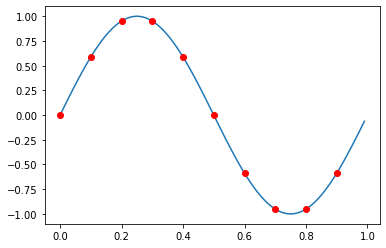

In [3]:
# The ground truth sinusoid
xground = arange(0, 1, 0.01)
yground = sin(2*pi*xground)

# Get some points at regular interval
x = arange(0, 1, 1./N)
tground = sin(2*pi*x)
        
plot(xground,yground)
plot(x, tground, 'ro')

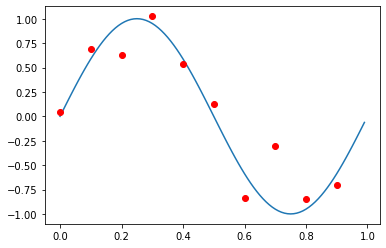

In [4]:
# Create our gaussian noise
std_deviation = 0.3
noise = std_deviation * randn(N)
t = tground + noise

plot(xground,yground)
plot(x, t, 'ro')

In [5]:
# Function to evaluate a polynomial with coefficients w
# (ordered by decreasing degree)
# could also use builtin polyval(w, x)
def polynomial(w, x):
    powers = arange(0,len(w))[::-1]
    
    powered = array(x)[:, newaxis] ** powers
    return dot(powered, w)

# Define our error function
def err(w, x, t):
    return 0.5 * sum((polynomial(w, x)-t)**2)

# Root Mean Square error - in same units as data
def rms(w, x, t):
    return sqrt(2 * err(w, x, t)/len(x))


[-1.78887271e+00  1.98293149e+01 -2.71899014e+01  8.93654375e+00
  2.30848663e-02]


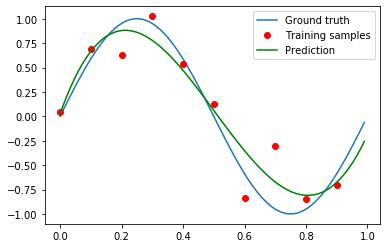

In [6]:
# As we shall see, the error can be minimised in closed form
# for the moment, we'll use the built-in function polyfit to do this

w = polyfit(x, t, M)
print(w)

# Let's see what our polynomial looks like (green)
plot(xground, yground)
plot(x, t, 'ro')
plot(xground, polynomial(w, xground), 'g')
legend(['Ground truth', 'Training samples', 'Prediction'])

Train Error 0.2583352303890549
Test Error 0.5892968106305138


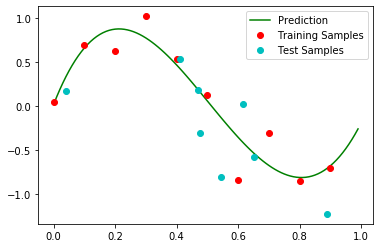

In [7]:
# Now we will define a testing set to see
# how well this model works, generated similarly
# to our training data
Ntest = 8
xtest = random_sample(Ntest)
ytest = sin(2*pi*xtest) + randn(Ntest) * std_deviation

plot(xground, polynomial(w, xground), 'g')
plot(x, t, 'ro')
plot(xtest, ytest, 'co')

print("Train Error", err(w, x, t))
print("Test Error", err(w, xtest, ytest))
legend(['Prediction', 'Training Samples', 'Test Samples'])

Train Error 1.1599993059438013e-19
Test Error 5.848149550032996


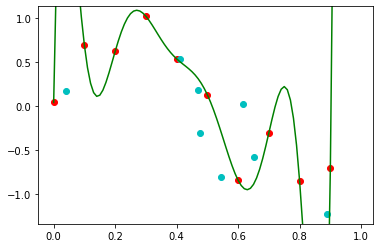

In [8]:
# What if we use a higher order polynomial?
w_higher = polyfit(x, t, 9)


plot(x, t, 'ro')
plot(xtest, ytest, 'co')
plot(xground, polyval(w_higher, xground), 'g', scaley=False)

print("Train Error", err(w_higher, x, t))
print("Test Error", err(w_higher, xtest, ytest))

# It passes directly through all our training points, but generalises
# poorly for predicting the test points - overfitting!


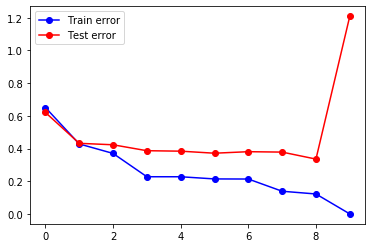

In [9]:
# Let's compare the train and test error for different
# orders of polynomial
test_err = []
train_err = []

maxorder = 10

for m in range(0,maxorder):
    weights = polyfit(x, t, m)
    train_err.append(rms(weights, x, t))
    test_err.append(rms(weights, xtest, ytest))
    
plot(range(0,maxorder), train_err, 'bo-')
plot(range(0,maxorder), test_err, 'ro-')
legend(['Train error', 'Test error'])